<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_8_Spring_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 310 Lecture 8 - Spring 2021

<font face="Chalkboard" color="darkgreen" size=5> Machine Learning with SKLearn: Linear Regression </font>


SKLearn is one of the most popular libraries for machine learning algorithms besides the ones focused solely on neural networks.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/mtcars.csv')

In [ ]:
data

In [ ]:
# we extract the input and the output for (linear) regression
x = data.wt.values
y = data.mpg.values

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# to create a plot we need matplotlib
import matplotlib.pyplot as plt

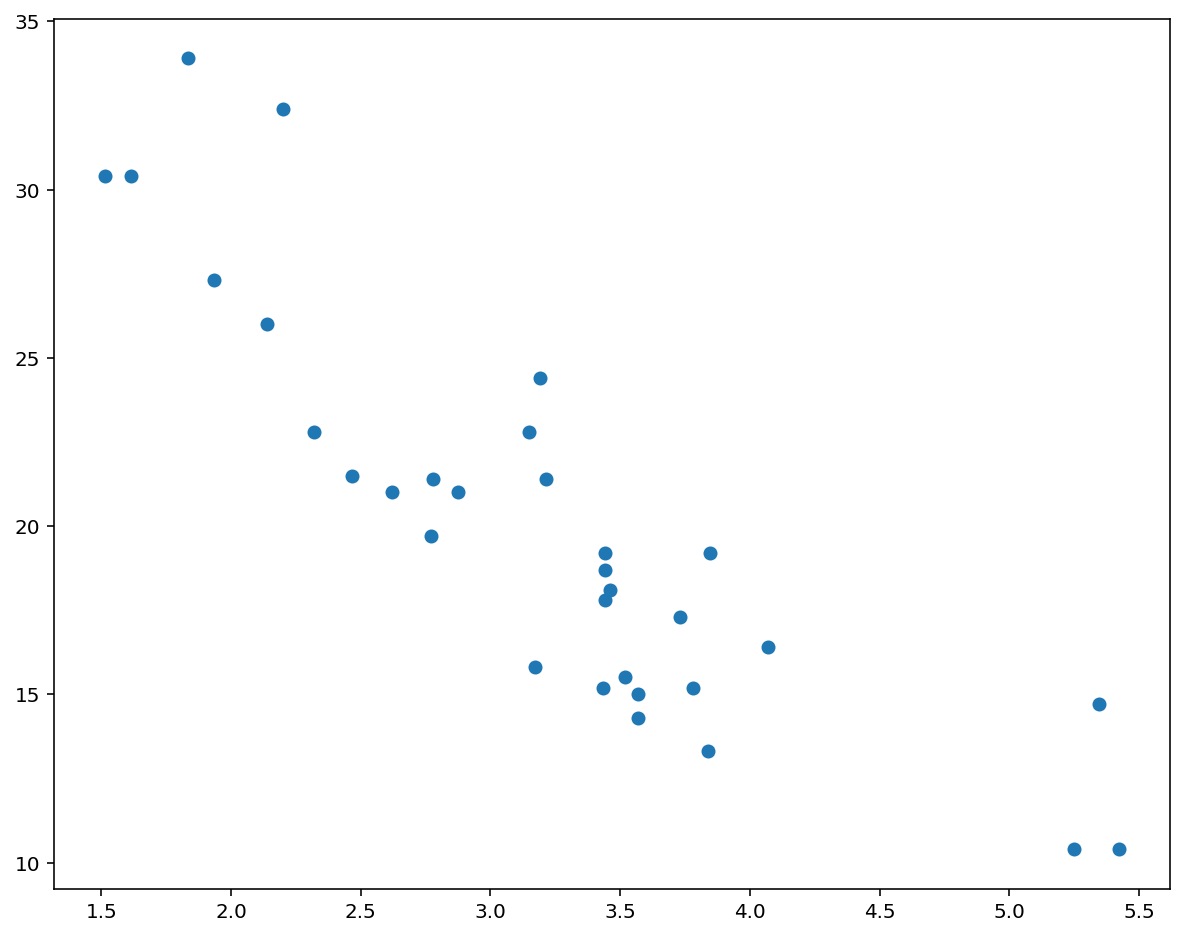

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x,y)
plt.show()

### Critical Thinking:
1. What is the meaning of linear regression?
2. Do we need a complicated algorithm for the intercept?
3. How do we validate predictions?

### Answers:
1. We want a predictive model that will show the correlation between variables. We want to estimate the *expected value of y* given the input data x.
2. No, we don't because the regression line passes through the center of mass i.e. $$(\bar{x},\bar{y})$$
3. The answer for this question is neither short or simple. We can consider a couple of things such as the distribution of the residuals, the coeffcient of determination such as $R^2$ and the Mean Square Error (or the Mean Absolute Error). We want to use K-Fold cross-validations.

### More definitions:

1. What is a residual?
2. What do we want about the distribution of residuals?
3. What is the coefficient of determination?

In [ ]:
# how to compute the intercept for a univariate model
# first we determine the center of mass
xbar = np.mean(x)
ybar = np.mean(y)

In [ ]:
# now think of the point-slope equation for a straight line.
# y - ybar = m * (x - xbar)
# remember that the regression line always passes through the center of mass.

(3.21725, 20.090625000000003)

We have $y = m\cdot x -m\cdot xbar +ybar$ so the intercept is $b = ybar - m\cdot xbar$

### Critical Thinking Question: How do we determine the slope?

Answer: we minimize the sum of the squared residuals and we can apply a gradient descent algorithm (here is where machine learning starts).

In [ ]:
zs = (wt-np.mean(wt))/np.std(wt)

In [ ]:
def zto(x):
  return (x-np.min(x))/(np.max(x)-np.min(x))

In [ ]:
zto(wt)

array([0.28304781, 0.34824853, 0.20634109, 0.43518282, 0.49271286,
       0.49782664, 0.52595244, 0.42879059, 0.41856303, 0.49271286,
       0.49271286, 0.65379698, 0.56686269, 0.57964715, 0.9555101 ,
       1.        , 0.97980056, 0.1756584 , 0.02608029, 0.08233188,
       0.24341601, 0.51316799, 0.49143442, 0.59498849, 0.59626694,
       0.10790079, 0.16031705, 0.        , 0.42367681, 0.32140118,
       0.52595244, 0.32395807])

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## <font color='navy'>Ordinary Least Squares Regression (Linear Regression)</font>

In the following example we learn how to write a code in Python for determining the line of best fit given one dependent variable and one *input* feature. That is to say we are going to determine a slope $m$ and an intercept $b$, the equation of the best fit line being $y=mx+b.$

We are going to analyze a real data set that was extracted from the 1974 *Motor Trend US* magazine and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973-1974 models).

In [ ]:
# imports
import numpy as np
import pandas as pd

In [ ]:
from sklearn import linear_model

cars = pd.read_csv("drive/MyDrive/Colab Notebooks/mtcars.csv")
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [ ]:
scaler = StandardScaler()
scaler.fit(cars[['wt']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler.fit_transform(cars[['wt']])

In [ ]:
qtn = QuantileTransformer(n_quantiles=100)

In [ ]:
qtn.fit_transform(cars[['wt']])*100

In [ ]:
np.argmax(qtn.fit_transform(cars[['wt']])*100)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (100) is greater than the total number of samples (32). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


15

The weight of the car is measured in 1000lbs to be the input and we want to create a linear model that predicts the average mileage *mpg* given the weight.

In [ ]:
v = cars[['wt']].values
v[np.argmin(qtn.fit_transform(cars[['wt']])*100)]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (100) is greater than the total number of samples (32). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([1.513])

In [ ]:
x = cars[['wt']]
y = cars[['mpg']]
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [ ]:
lm.predict([[2.0]])

array([[26.59618302]])

In [ ]:
lm.intercept_

array([37.28512617])

In [ ]:
lm.coef_

array([[-5.34447157]])

### What is the interpretation of the slope?

The expected drop (on average) in mpg when the weight increases by one unit.

In [ ]:
(x-np.mean(x))/np.std(x)

In [ ]:
# we can get the slope and the y-intercept

m = lm.coef_
n = lm.intercept_

print('The slope is:'+str(m))
print('The intercept is:'+str(n))

The slope is:[[-5.34447157]]
The intercept is:[37.28512617]


In [ ]:
xb = np.mean(x.values)
yb=np.mean(y.values)

Thus, the equation of the best fit line is $$y = mx + b.$$

<font color='red'> CRITICAL THINKING: How *exactly* are we obtaining the slope and the intercept?</font>

<font color='forestgreen'>ANSWER: One way to obtain the slope and the intercept is by applying the *Ordinary Least Squares* method.</font>

We determine the values of <font color='blue'>$m$</font> and <font color='red'>$b$</font> such that the sum of the square distances between the points and the line is *minimal*.</font>

<figure>
<center>
<img src='https://drive.google.com/uc?id=16s5RAyNsFB17nut3jJMqPsPxmbLC_wP2'
width='600px' />
<figcaption>Source: Simple Linear Regression (Tobias Roeschl)</figcaption></center>
</figure>


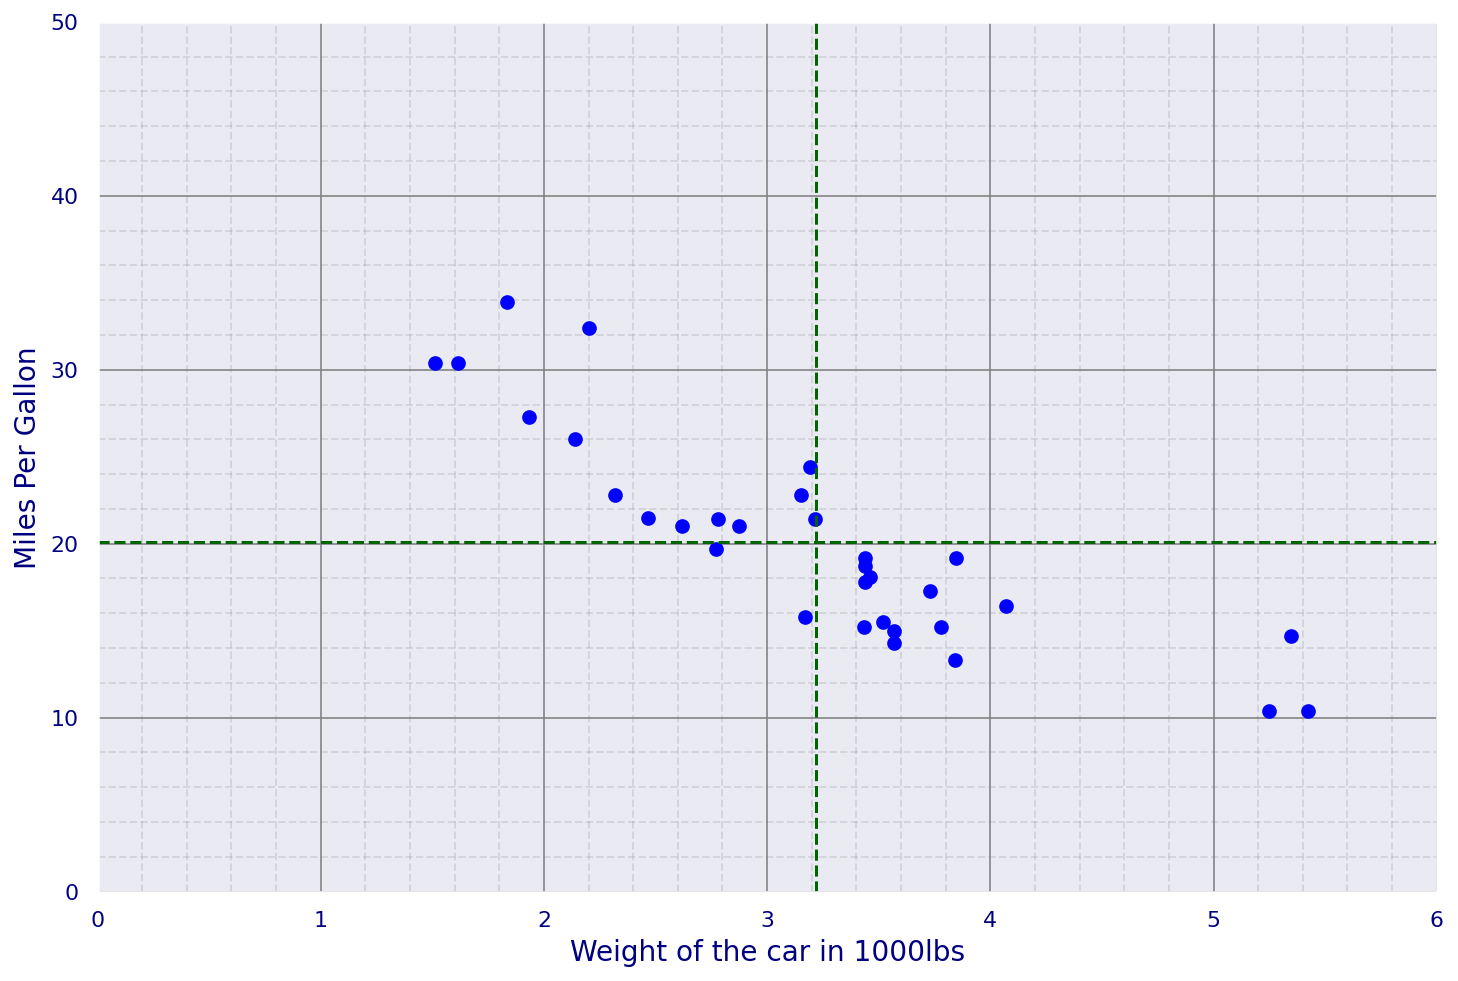

In [ ]:
import matplotlib.pyplot as plt
x_range = np.arange(np.max(x.values)+1)
yhat = lm.predict(x_range.reshape(-1,1))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x,y,color='blue',s=40)
#ax.plot(x_range.reshape(-1,1), yhat, '-',color='red',lw=2.5)
ax.set_xlim(0, 6)
ax.set_ylim(0, 50)
ax.set_xlabel('Weight of the car in 1000lbs',fontsize=14,color='navy')
ax.set_ylabel('Miles Per Gallon',fontsize=14,color='navy')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.axvline(x=xb, color='darkgreen',linestyle='dashed')
plt.axhline(y=yb, color='darkgreen',linestyle='dashed')
plt.tick_params(axis='x', colors='navy')
plt.tick_params(axis='y', colors='navy')
ax.minorticks_on()
plt.show()

In [ ]:
np.mean(x)

wt    3.21725
dtype: float64

### CRITICAL THINKING: What is the interpretation of the line of best fit?

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x.values)
zx = scaler.transform(x.values)

scaler.fit(y.values)
zy = scaler.transform(y.values)

In [ ]:
zy = pd.DataFrame(zy)

In [ ]:
zy.columns=['zy']

In [ ]:
zx = (x - np.mean(x))/np.std(x)
zy = (y - np.mean(y))/np.std(y)

In [ ]:
model = lm.fit(zx,zy)

In [ ]:
model.intercept_

array([1.09961675e-15])

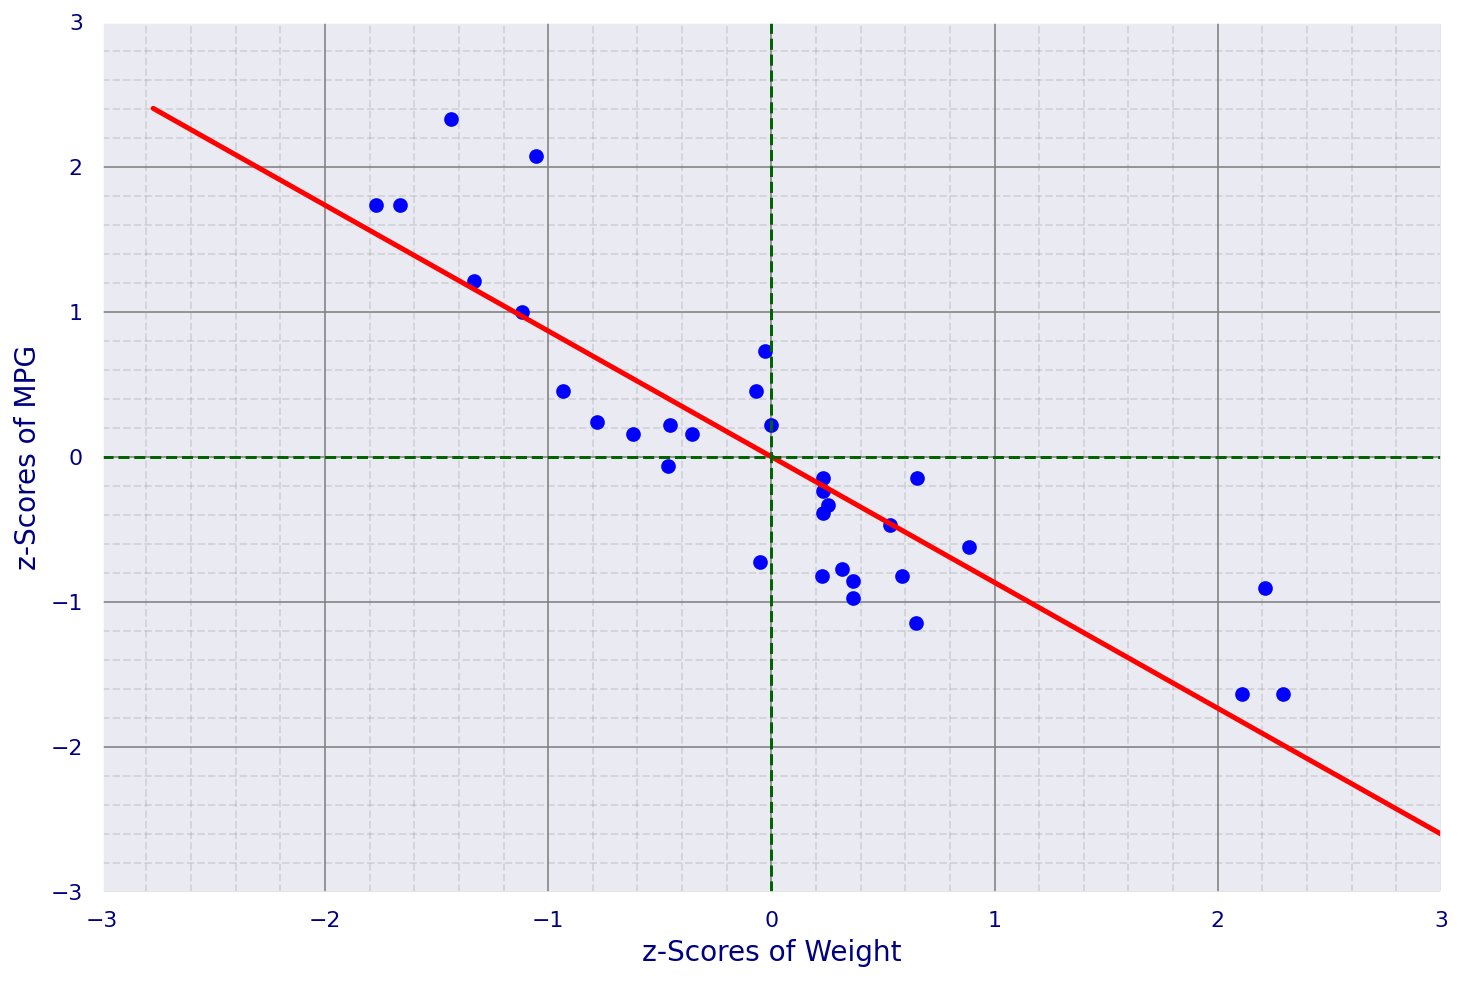

In [ ]:
zx_range = np.arange(np.min(zx.values)-1,np.max(zx.values)+1)
yhat = lm.predict(zx_range.reshape(-1,1))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(zx,zy,color='blue',s=40)
ax.plot(zx_range.reshape(-1,1), yhat, '-',color='red',lw=2.5)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel('z-Scores of Weight',fontsize=14,color='navy')
ax.set_ylabel('z-Scores of MPG',fontsize=14,color='navy')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.axvline(x=xb, color='darkgreen')
plt.axhline(y=yb, color='darkgreen')
plt.tick_params(axis='x', colors='navy')
plt.tick_params(axis='y', colors='navy')
plt.axvline(x=0, color='darkgreen',linestyle='dashed')
plt.axhline(y=0, color='darkgreen',linestyle='dashed')
ax.minorticks_on()
plt.show()

## The Anatomy of the Gradient Descent Algorithm

---



In [ ]:
x

array([2.62 , 2.875, 2.32 , 3.215, 3.44 , 3.46 , 3.57 , 3.19 , 3.15 ,
       3.44 , 3.44 , 4.07 , 3.73 , 3.78 , 5.25 , 5.424, 5.345, 2.2  ,
       1.615, 1.835, 2.465, 3.52 , 3.435, 3.84 , 3.845, 1.935, 2.14 ,
       1.513, 3.17 , 2.77 , 3.57 , 2.78 ])

In [ ]:
#hyperparamters
learning_rate = 0.01
initial_b = 0
initial_m = 0
num_iterations = 1000
data = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)

In [ ]:
data

array([[ 2.62 , 21.   ],
       [ 2.875, 21.   ],
       [ 2.32 , 22.8  ],
       [ 3.215, 21.4  ],
       [ 3.44 , 18.7  ],
       [ 3.46 , 18.1  ],
       [ 3.57 , 14.3  ],
       [ 3.19 , 24.4  ],
       [ 3.15 , 22.8  ],
       [ 3.44 , 19.2  ],
       [ 3.44 , 17.8  ],
       [ 4.07 , 16.4  ],
       [ 3.73 , 17.3  ],
       [ 3.78 , 15.2  ],
       [ 5.25 , 10.4  ],
       [ 5.424, 10.4  ],
       [ 5.345, 14.7  ],
       [ 2.2  , 32.4  ],
       [ 1.615, 30.4  ],
       [ 1.835, 33.9  ],
       [ 2.465, 21.5  ],
       [ 3.52 , 15.5  ],
       [ 3.435, 15.2  ],
       [ 3.84 , 13.3  ],
       [ 3.845, 19.2  ],
       [ 1.935, 27.3  ],
       [ 2.14 , 26.   ],
       [ 1.513, 30.4  ],
       [ 3.17 , 15.8  ],
       [ 2.77 , 19.7  ],
       [ 3.57 , 15.   ],
       [ 2.78 , 21.4  ]])

In [ ]:
# the average of the squared residuals.
def compute_cost(b, m, data):
    total_cost = 0
    
    # number of datapoints in training data
    N = float(len(data))
    
    # Compute sum of squared errors
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    # Return average of squared error
    return total_cost/(2*N)

In [ ]:
def step_gradient(b_current, m_current, data, alpha):
    """takes one step down towards the minima
    
    Args:
        b_current (float): current value of b
        m_current (float): current value of m
        data (np.array): array containing the training data (x,y)
        alpha (float): learning rate / step size
    
    Returns:
        tuple: (b,m) new values of b,m
    """
    
    m_gradient = 0
    b_gradient = 0
    N = float(len(data))

    # Calculate Gradient
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    # Update current m and b
    m_updated = m_current - alpha * m_gradient
    b_updated = b_current - alpha * b_gradient

    #Return updated parameters
    return b_updated, m_updated

def gradient_descent(data, starting_b, starting_m, learning_rate, num_iterations):
    """runs gradient descent
    
    Args:
        data (np.array): training data, containing x,y
        starting_b (float): initial value of b (random)
        starting_m (float): initial value of m (random)
        learning_rate (float): hyperparameter to adjust the step size during descent
        num_iterations (int): hyperparameter, decides the number of iterations for which gradient descent would run
    
    Returns:
        list : the first and second item are b, m respectively at which the best fit curve is obtained, the third and fourth items are two lists, which store the value of b,m as gradient descent proceeded.
    """

    # initial values
    b = starting_b
    m = starting_m
    
    # to store the cost after each iteration
    cost_graph = []
    
    # to store the value of b -> bias unit, m-> slope of line after each iteration (pred = m*x + b)
    b_progress = []
    m_progress = []
    
    # For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, data))
        b, m = step_gradient(b, m, data, learning_rate)
        b_progress.append(b)
        m_progress.append(m)
        
    return [b, m, cost_graph,b_progress,m_progress]

In [ ]:
b, m, cost_graph,b_progress,m_progress = gradient_descent(data, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, data))

Optimized b: 37.285117303091454
Optimized m: -5.344469026915932
Minimized cost: 278.3219375435501


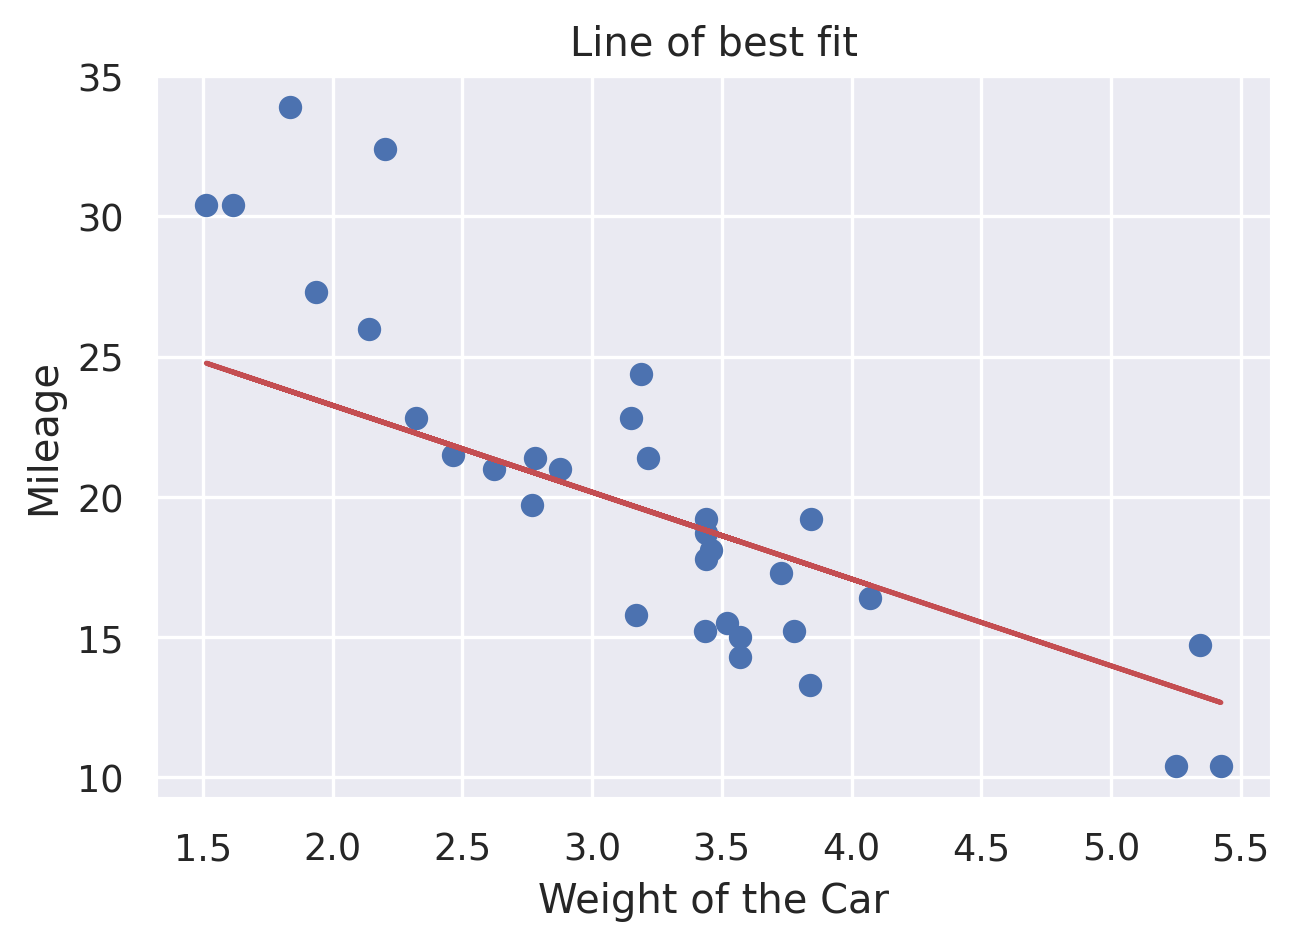

In [ ]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Weight of the Car')
plt.ylabel('Mileage')
plt.title('Line of best fit')
plt.show()